In [ ]:
bayes factor is always better than pvalue
contrast hypothesis testing
taken from cs109 handout

cs109 handout from this book
https://chrispiech.github.io/probabilityForComputerScientists/en/examples/mixture_models/
    

<h6>Given a set of data, how to fit this? MLE and MAP estimation to fit data</h6>

<h6>Parameters distributions</h6> 
<table style="width:100%">

<tr>Bernoulli&nbsp $theta=p$</tr>
<tr>Poisson&nbsp $theta = lambda$</tr>
<tr>Normal&nbsp $theta= (mu,sigma^2) $</tr>
<tr>Uniform&nbsp $theta=(a,b)$</tr>
<tr>Linear Regression $Y=mX+b$&nbsp $theta=(m,b)$</tr>
</table>

<h6>MLE Normal</h6>
$$
L(\theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\theta_1}} e^{-\frac{(X_i-\theta_0)^2}{2\theta_1}}
$$
<p>
Converting from argmax $L(\theta)$ to $-argmin(log(L(\theta)))$
</p>

<p>
$$
-log(L(\theta)) = -(\sum_{i=1}^{n}log(2\pi\theta_1)^{-\frac{1}{2}}) - \sum_{i=1}^{n}log(e^{\frac{-(X_i-\theta_{0})^{2}}{2\theta_1}})
$$

$$
=\frac{1}{2}\sum_{1}^{n}(2\pi\theta_1) + \sum_{1}^{n}(\frac{(X_i-\theta_0)^2}{2\theta_1})
$$

$$
\frac{\partial(LL(\theta))}{\partial \theta_0} = \partial(\sum_{1}^{n}(\frac{(X_i-\theta_0)^2}{2\theta_1}))d\theta_0
$$

$$
0=\sum_{1}^{n}-2\frac{(X_i-\theta_0)}{2\theta_1}
$$

$$
\sum_1^n \theta_0 = \sum_1^n(X_i)
$$

$$
\theta_0 = \frac{1}{n}\sum_1^{n}(X_i) = \bar \mu
$$

$$
\frac{\partial(LL(\theta))}{\partial \theta_1} = \frac { \partial \frac{1}{2}(\sum_{1}^{n}(2\pi\theta_1))}{\partial \theta_1}  + \frac{\partial \sum_{1}^{n}(\frac{(X_i-\theta_0)^2}{2\theta_1})}{\partial \theta_1}
$$
$$
 0 = n\pi - \sum(X_i-\theta_0)^2\theta_1^{-2}
$$
$$
 n\pi \theta_1^{2} = \sum(X_i-\theta_0)^2
$$
$$
 \theta_1^{2} =\frac{1}{n\pi} \sum(X_i-\theta_0)^2
$$

</p>

 



<h6>MAP Normal</h6>
<p>
$$
MAP(\mathcal{N(\mu, \sigma)}) = argmax f(\theta | X_1,X_2,...X_n) = argmax\frac{f(X_1,X_2,...X_n|\theta)g(\theta)}{h(X_1,X_2,...X_n)}
$$
$$
 = argmax \frac{\sum_{i=1}^{n}f(X_i|\theta) g(\theta)}{h(X_1,X_2,...X_n)}
$$
<p>
h(X) is constant and can be disregarded when we take the derivative and set to zero to solve for theta
</p>
$$
= argmax (g(\theta))\prod f(X_i|\theta)
$$
where g(theta) is the prior and $f(X_i|\theta)$ is the likelihood
</p>
<p>likelihood normal distribution</p>
$$
f(X_i|\theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\theta_1}} e^{-\frac{(X_i-\theta_0)^2}{2\theta_1}}
$$

<p>Prior is a normal distribution
$$
prior(\theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\theta_1}} e^{-\frac{(X_{i}-\theta_0)^2}{2\theta_1}}
$$
The trick is to break up the prior into a normal prior for the mean mu and another normal prior for the variance sigma
$$
\mu | D,\sigma^2 \sim \mathcal{N} \left( \frac{1}{\frac{1}{\sigma_0^2}+\frac{1}{\sigma_1^2}} \left( \frac{\mu_0}{\sigma_0^2} + \frac{\sum_1^n x_i}{\sigma^2} \right),\left(\frac{1}{\sigma_0^2} + \frac{1}{\sigma^2} \right) \right)
$$
the variance follows an inverse chi squared distrubution
$$
\sigma^2 | D,\mu \sim Inv-\chi^2 \left(  v+n, \frac{v\sigma_0^2 + \sum_1^n(x_i - \mu)^2}{v+n}   \right) 
$$
</p>
<p>we cnat solve these analytically, use numerical technique, gibbs sampling. Example R is interested in length of dolphhins
and picks a prior of $N(350,60^2)$</p>
<p>how to pick v for $\sigma^2?$. If you pick 1, has no mean or variance, pick 2 has mean but no variance, pick 3 or 4.  </p>
<p>
$$
\sigma^2 \sim  Inv - \chi^2(60^2,4)
$$
</p>
<p>
She goes out and gets data={310,332 ,341,311,315,352,323}
$$
\sum x_i = 2284, n=7
$$

</p>

In [ ]:
https://www.youtube.com/watch?v=TrO4ANmlzDg
    https://www.youtube.com/watch?v=b9OQSsui9qE

In [ ]:
http://www.stat.ucla.edu/~zhou/courses/Stats102C/Stats102C-Syllabus-16S.pdf
    stat102c 
    https://www.youtube.com/watch?v=Wzvy0n0LwOo
        
review

In [ ]:
import numpy.random.normal as rnorm

x1=[310,332 ,341,311,315,352,323]
mu_0 = 360
sigma2_0 = 60**2
v1=4
n1=7
sum1=sum(x1)
mu_var1 = 1/sigma2_0 + n1/sigma2


In [ ]:
https://math.mit.edu/~dav/05.dir/class15-prep.pdf
how to update postrior/prior based on new data points. 
how do we know if datapoint doesnt fit? outlier and we have teh wrong distribution? We sample from the posterior
and see if it fits. 
#the best logistic bayesian so far
https://towardsdatascience.com/building-a-bayesian-logistic-regression-with-python-and-pymc3-4dd463bbb16

hamiltonian MCMC vs Metropolis hastings
https://www.youtube.com/watch?v=ZGtezhDaSpM
    
https://www.youtube.com/watch?v=RVWfbOHCalM&list=PLeB45KifGiuHesi4PALNZSYZFhViVGQJK&index=40a
   

<h6>MLE Poisson</h6>
The PMF for a discrete RV with Poisson distribution leads to the following likelihood function: 
$$
L(\theta) = \prod_{i=1}^{n}\frac{e^{-\lambda}}{X_{i}!}\lambda^{X_i}
$$
As an aside the difference between likelihood and PMF for a discrete RV and PDF for a continuous RV lies in the
notation. The above notation is incorrect but it confuses people if we use the correct notation. A likelihood is based observed data. We denote observstions as O as outcomes and theta as the set of parameters which specify the shape of the probabilty density or mass. $P(O|\theta)$ is the probability we observe otucomes O. When presented with data we don't know theta, we see O and if we are given theta we can calcualte the probability $P(O|\theta)$ by maximixing the $P(O|\theta)$ as function. Converting the Probability density or mass to a likelihood function gives: 
$$
L(\theta|O) = P(O | theta)
$$
The likelihood fn is conditioned on the observed data while the probability density or mass is conditoined on the parameters
of the distribution, theta. For the purposes of the derivative we leave out the O. 
<p>
Given the Likelihood, the MLE estimator is called theta-hat, where the hat notation is for an estimator. 
</p>
$$
\hat \theta = argmax L(\theta)
$$ 
<p>
We can transform a constant
or increasing PDF by taking the log and adding a negative sign to find a minimum instead of a maximum resulting
in a negative log likelihood estimator 
</p>
$$
NLL(\theta)=-LogLikelihood(\theta) = -argmin log(L(\theta))
$$
This is confusing. The convention is to use $\theta$ but the equation is in $\lambda$. We convert theta to lambda. 

$$
-\frac{\partial LogLikelihood(\theta)}{\partial \theta} =  \partial \frac{-log \sum_{i=1}^{n}\frac{e^{-\lambda}}{X_{i}!}\lambda^{X_i}}{\partial \lambda}
$$
$$
=- \frac{ \partial (log \sum_{i=1}^{n}\frac{e^{-\lambda}}{X_{i}!}\lambda^{X_i})}{\partial \lambda}
$$
<p>

$$
=\frac{\partial \sum_{i=1}^{n}(log(e^{-\lambda}\lambda^{X_i})-log(X_i!))}{\partial \lambda}
$$

$$
= \frac{\partial \sum(log e^{-\lambda}+log\lambda^{X_i}-log(X_i!))}{\partial \lambda} 
$$

$$
= \frac{\partial (-n\lambda + \sum(X_ilog\lambda -log(X_i!)))}{\partial \lambda}
$$

$$
\frac{\partial (-n\lambda)}{\lambda} = n
$$

$$
\frac{\partial log\lambda \sum{X_i}}{\partial \lambda} = \frac{\sum{X_i}}{\lambda}
$$

$$
\frac{\partial \sum(log (-X_i!)}{\partial \lambda} = 0
$$

$$
0=-n + \frac{\sum^{n}(X_i)}{\lambda}
$$
$$
n\lambda = \sum^{n}(X_i)
$$
$$
\lambda = \frac{1}{n}\sum X_i   = \bar \mu                
$$
                    
</p>

In [ ]:
https://vioshyvo.github.io/Bayesian_inference/conjugate-distributions.html
    UW course notes state 544
https://sites.stat.washington.edu/mmp/courses/stat544/Handouts/l6-inference.pdf

<h6>MAP Poisson </h6>

<p>

the argmax map estimator for the poisson is derived from bayes rule, the likelihood function for our set of n 
data points multiplied by the prior divided by the posterior. The posterior is a constant so we can ignore this 
when we take our derivative and solve for arg max. 
$$
\lambda^{MAP} = argmax_{\lambda} P(\lambda | D) = argmax_{\lambda} P(D|\lambda)P(\lambda|y)
$$
</p>

<p>
The prior for the Poisson distribution the conjugate prior of the Poisson likelihood function we used in the MLE
derivation 
$$
MAP_{\theta} = argmax_{\theta}  \left( \prod_{i=1}^{n}\frac{e^{-\lambda} \lambda^{X_i}} {X_{i}!} {\lambda^{\alpha-1}}{e^{-\beta\lambda}} \right)
$$</p>

In [ ]:
<p>Zero inflated poisson</p>
<p>https://www.youtube.com/watch?v=othUlpJG8Tg</p>
$$
p(y) = (1-\alpha)\frac{\lambda^{y}e^{-\lambda}}{y!}
$$

<h6>Chi square and poisson fitting</h6>
If events are occuring randomly and independently and the P(event) does not change over time or given interval of
time then we can assume Poisson. The RV X is the number of events in a fixed unit of time. Problem is there are always
external factors which bias this, weather, etc. PD,$\lambda=np$ approximates binomial distribution if n is large and p is small.
How large and how small? 

issues: https://www.youtube.com/user/jbstatistics/videos

Used for contingency tables and count data. This should be the first analysis method for categorical data. 
chi square goodness of fit is not good for small sample sizes, 
https://www.theanalysisfactor.com/regression-models-for-count-data/
https://stats.stackexchange.com/questions/78139/how-to-know-if-a-data-follows-a-poisson-distribution-in-r
Chi square only first test
Poisson regression for count data
https://stats.oarc.ucla.edu/r/dae/poisson-regression/#:~:text=Poisson%20regression%20%E2%80%93%20Poisson%20regression%20is,variance%20exceeds%20the%20conditional%20mean.
negative binomial regrssion for overdispersed count data
zero inflated regression model for zeros, combine models, one for 0s another for rest of data


<p>Poisson Regression</p>
Fitting zero count data. https://www.youtube.com/watch?v=cD9V1ApYqCk which says if you have an AIC difference between 
    0 inflated and nonzero inflated more than 2 you use the one w lower AIC. 
zero inflated model. No way to do this in R? 
https://stats.oarc.ucla.edu/r/dae/zip/#:~:text=Zero%2Dinflated%20poisson%20regression%20is,zeros%20can%20be%20modeled%20independently.
    

Zero inflated binomial
<p>https://faculty.franklin.uga.edu/dhall/sites/faculty.franklin.uga.edu.dhall/files/ZIMixed.pdf</p>

<h6>MLE Multinomial</h6>
<p>
$$
P(x_1,x_2,...x_k|n,p_1,p_2,...p_k) = \frac{N!}{\prod_{i=1}^{x_i!}}p_{i}^{x_i},\ \sum_i x_i=N, x_i \ge > 0
$$
</p>

<p>
Beta Distribution, conjugate prior of Binomial
</p>
<p>
$$
p(p|\alpha, \beta) = \frac{1}{B(\alpha, \beta)} p^{\alpha-1}(1-p)^{\beta -1},\ p=[0,1]
$$
<p>Beta function</p>
$$
B(\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha),\Gamma(\beta)} \approx \binom{\alpha -1}{\alpha+ \beta-2}
$$
</p>
<p>
Dirichlet Distribution, conjugate prior of multinomial
</p>
<p>
$$
p(P={p_i}| \alpha_i)=\frac{\prod_i \Gamma(\alpha_i)}{\Gamma(\sum_i \alpha_i)}\prod p_i^{\alpha_i-1}
$$
$$
\sigma = \sum(\alpha_i) 
$$
$$
base=\frac{\alpha_i}{\sigma}
$$


</p>

In [ ]:
https://www.cs.cmu.edu/~epxing/Class/10701-08s/recitation/dirichlet.pdf

<h6>MAP Bernoulli </h6>
<p>
source: file:///Users/dougchang/Documents/Joint_MLE_MAP.pdf
$$
\hat \theta = \frac{\alpha1 + \gamma1}{(\alpha1 + \gamma1)+(\alpha0 + \gamma0)}
$$
</p>
<p>$\alpha0$ and $\alpha1$ are observed tails and heads from training data. $\gamma0$ and $\gamma1$ are
prior beliefs, if we believe a fair coin then set $\gamma0=100$ and $\gamma1=100$ </p>
<h4>MAP Derivation</h4>
<p>
$$
\theta^{MAP} = argmax_{\theta} P(\theta | D) =argmax_{\theta} \frac{P(D|\theta)P(\theta)}{P(D)}
$$
</p>
<p>We ignore P(D) since it has no theta parameter and will fall out when taking a derivative. Take the log, 
take derivative and set to 0 to solve for parameters. We add a beta distribution for the prior $P(\theta)$. This conjugate
prior is knownb before hand. If have no knowledge assume a uniform distribution then after observation of data you
can correct the distribution. </p>

<p>
$$
P(\theta) = Beta(\beta_0,\beta_1) =\frac{\theta^{\beta_{1}-1}(1-\theta)^{\beta_{0}-1}}{B(\beta_0,\beta_1)}
$$
where B is a normalization constant to make sure the integral is 1. 
</p>
<p>
$$
P(D|\theta) = \theta^{\alpha_1}(1-\theta)^{\alpha_0}
$$
and alpha1 is observed when X=1 and alpha0 are observed when X=0 or observed count of heads=1 and tails=0.
The complete equation for MAP estimation is:
$$
\theta^{MAP} = argmax_{\theta} P(\theta | D) = argmax_{\theta} \theta^{\alpha_1}(1-\theta)^{\alpha_0} \frac{\theta^{\beta_{1}-1}(1-\theta)^{\beta_{0}-1}}{B(\beta_0,\beta_1)}
$$
$$
= argmax_{\theta} \frac{\theta^{\alpha_1 + \beta_{1}-1}(1-\theta)^{\alpha_0 + \beta_{0}-1}}{B(\beta_0,\beta_1)}
$$
we can remove the normalizing constant B because it does not have any $\theta$ terms in it and will fall out 
when taking the derivative and setting to 0. 
$$
= argmax_{\theta}\theta^{\alpha_1 + \beta_{1}-1}(1-\theta)^{\alpha_0 + \beta_{0}-1}
$$
$$
\frac{\partial \theta^{MAP}}{\partial \theta} = (\alpha_1 + \beta_{1}-1)\theta^{\alpha_1 + \beta_{1}-2}(1-\theta)^{\alpha_0 + \beta_{0}-1}+\theta^{\alpha_1 + \beta_{1}-1}(\alpha_0 + \beta_{0}-1)(1-\theta)^{\alpha_0 + \beta_{0}-2}(-1)
$$
$$
= (\alpha_1 + \beta_{1}-1)(1-\theta) - (\alpha_0 + \beta_{0}-1)(\theta)
$$
$$
(\alpha_1 + \beta_{1}-1)(1-\theta) = (\alpha_0 + \beta_{0}-1)(\theta)
$$
$$
(\alpha_1 + \beta_{1}-1) - (\alpha_1 + \beta_{1}-1)\theta = (\alpha_0 + \beta_{0}-1)(\theta)
$$
$$
(\alpha_1 + \beta_{1}-1) = (\alpha_1 + \beta_{1}-1)\theta + (\alpha_0 + \beta_{0}-1)\theta
$$
$$
(\alpha_1 + \beta_{1}-1) = \theta (\alpha_1 + \beta_{1}-1 + \alpha_0 + \beta_{0}-1)) 
$$
$$
\theta = \frac{\alpha_1 + \beta_{1}-1}{\alpha_1 + \beta_{1}-1 + \alpha_0 + \beta_{0}-1}
$$
Drop the 1 from the numerator and denominators to get Tom M. answer. Others have the -1 and -2 in the 
expressions for MAP. 
</p>
<p>
https://sci2lab.github.io/ml_tutorial/mle_map/
</p>





<h6>MAP Bernoulli nonconjugate example</h6>
<p>When we have no information we can use a uniform prior. Suppose we have a online store where we get 3 out of 250 
visitors to buy. We do not know what the prior distirbution is so we can assume a uniform prior, say 10%. Then as more
model sees more data we will converge to the correct anaswer anyway.</p>

<p>Uniform distribution 
The standard symbol for a prior is $\pi(p)$
$$
\pi(p) = 
\begin{cases}
  \pi(p) = 10 & \text{for }0 \ge p \le 0.l\\    
  \pi(p) = 0  & \text {otherwise}
\end{cases}
$$
</p>
<p>
The liklihood for a bernoulli distribution for 3 out of 250 customers buying is:
$$
  L(D|p) = p^3(1-p)^250
$$

</p>
<p>
The MAP probability is: 
$$
\pi(p|D) = \frac{L(D|p)}{\int_{0}^{0.1}10p^3(1-p)^{250}}=\frac{ p^3(1-p)^250}{\int_{0}^{0.1}10p^3(1-p)^{250}}
$$
</p>
<h6>
Numerical integration 
</h6>
<p>We use small step sizes and sums to approximate Riemann integrals</p>





1.4836151253121748e-06
1.483615164881154e-06


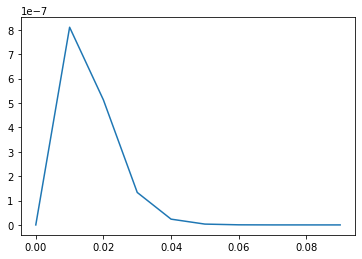

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#it is important to use vectorized operations. 
def func(x):
    return 10.*(x**3.)*(1-x)**250.
    

small_steps=np.arange(0,0.1,.01)
v_func = np.vectorize(func)
integration_result = np.sum(v_func(small_steps))
print(integration_result)

check_normalized=np.arange(0,1.,.01)
#print(check_normalized)
print(np.sum(v_func(check_normalized)))
plt.plot(small_steps,func(small_steps))
plt.show()

In [10]:
#test integral for qpred 
#should get something equal to .05
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats, optimize, interpolate

betacdf = scipy.stats.beta(14.2,23.2).cdf
#print(betacdf(0.256)-betacdf(0.)) #use this to guess
x=.001
while betacdf(x)-betacdf(0.)-.05 < .0001:
    x+=.001
print(x,betacdf(x)-betacdf(0.))
x=.9
while betacdf(1.)-betacdf(x)-.05 < .0001:
    x-=.001
print(x,betacdf(1.)-betacdf(x))

0.05235376084736374
0.25500000000000017 0.050816439280903326
0.5119999999999997 0.05039394391063978


In [ ]:
concave or convex? 
https://pj.freefaculty.org/guides/stat/Distributions/DistributionWriteups/Beta/Beta.pdf

In [ ]:
https://probabilityandstatsproblemsolve.wordpress.com/2015/05/10/calculating-the-skewness-of-a-probability-distribution/
    given data do we use this to calculate the skewness of an arbitrary PDF? 


blue mean1:0.80,var1:0.05,skew1:-1.25,kurt1:0.82
red mean2:0.25,var2:0.04,skew2:0.86,kurt2:0.10
green mean3:0.50,var3:0.12,skew3:0.00,kurt3:-1.50:
orange mean4:0.50,var4:0.05,skew4:0.00,kurt4:-0.86:
purple uniform mean5:0.50,var5:0.05,skew5:0.00,kurt5:-0.86:


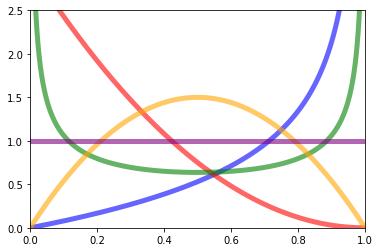

In [41]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

#beta is used for uniform distribution also

fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
#x = np.linspace(beta.ppf(0.01, a, b),
#                beta.ppf(0.99, a, b), 100)
x = np.linspace(0,1,1000)
#[xmin, xmax, ymin, ymax]
plt.axis([0,1.0 , 0, 2.5])
mean1, var1, skew1, kurt1 = beta.stats(2., .5, moments='mvsk')
ax.plot(x, beta.pdf(x, 2., .5),
       'blue', lw=5, alpha=0.6, label='beta1')

ax.plot(x, beta.pdf(x, 1, 3),
       'red', lw=5, alpha=0.6, label='beta2')
mean2, var2, skew2, kurt2 = beta.stats(1., 3., moments='mvsk')
ax.plot(x, beta.pdf(x, .5, .5),
       'green', lw=5, alpha=0.6, label='beta3')
mean3, var3, skew3, kurt3 = beta.stats(.5, .5, moments='mvsk')
ax.plot(x, beta.pdf(x, 2, 2),
       'orange', lw=5, alpha=0.6, label='beta4')
mean4, var4, skew4, kurt4 = beta.stats(2., 2., moments='mvsk')

ax.plot(x, beta.pdf(x, 1, 1),
       'purple', lw=5, alpha=0.6, label='uniform')
mean5, var5, skew5, kurt5 = beta.stats(2., 2., moments='mvsk')

print(f"blue mean1:{mean1:.2f},var1:{var1:.2f},skew1:{skew1:.2f},kurt1:{kurt1:.2f}")
print("red mean2:%.2f,var2:%.2f,skew2:%.2f,kurt2:%.2f" % (mean2,var2,skew2,kurt2))
print("green mean3:%.2f,var3:%.2f,skew3:%.2f,kurt3:%.2f:" % (mean3,var3,skew3,kurt3))
print("orange mean4:%.2f,var4:%.2f,skew4:%.2f,kurt4:%.2f:" % (mean4,var4,skew4,kurt4))
print("purple uniform mean5:%.2f,var5:%.2f,skew5:%.2f,kurt5:%.2f:" % (mean5,var5,skew5,kurt5))


In [ ]:
https://stats.stackexchange.com/questions/114004/when-is-beta-distribution-bell-shaped-or-concave
add more derivatives for range and graph shape changes. this should be im the metrics and affect
the statistics? 
#how to find the wrong a and b values? 


In [ ]:
https://pj.freefaculty.org/guides/stat/Distributions/DistributionWriteups/Beta/Beta.pdf
why is this so good in predicting elections? and what other problems are like this? 

In [ ]:
<h6>Bernoulli pdf and cdf</h6>
<p>
the pmf for a bernoulli RV is:
$$
f(x) = p^x(1-p)^(1-x)
$$
the cdf for a bernoulli RV is the integral of a PDF or sum of a PMF:
$$

$$
</p>

<h6>MLE Bernoulli</h6>
<p>$L(\theta)=\prod_{i=1}^{n} p^{X_i}(1-p)^{1-{X_i}}$</p>
<p>convert liklihood to negative log liklihood</p>
<p>$-LogLikelihood(\theta)=-\sum_{i=1}^{n} log(p^{X_i}(1-p)^{1-{X_i}})$</p>
<p>=$\sum_{i=1}^{n}X_i(log(p))+(1-X_i)log(1-p)$</p>
<p>=$Ylog(p) + (n-Y)log(1-p)$</p>
<p>where $Y=\sum_i^n(X_i)$</p>
<p>To find the maximum take the derivative WRT theta and set to 0. Solve for X_i</p>
<p>$\frac{\partial LogLikelihood(\theta)}{\partial \theta} = 
\frac{\partial LogLikelihood(p)}{\partial p}=
\frac{\partial(Ylog(p) + (n-Y)log(1-p))}{\partial (p)} $</p>
<p>$\frac{\partial log(p)}{\partial (p)} = \frac{1}{p}dp$</p>
<p>$\frac{\partial(Ylog(p) + (n-Y)log(1-p))}{\partial (p)}= \frac{Y}{p}dp - \frac{n-Y}{1-p}dp = 0$</p>
<p>$ \frac{Y}{p} = \frac{n-Y}{1-p}$</p>
<p>$ (Y)(1-p) = (n-Y)(p)$</p>
<p>$ Y-Yp = np-Yp$</p>
<p>$ Y = np$</p>
<p>$ \frac{Y}{n} = p$</p>
<p>After replacing the summation for Y we see the p is the mean of $X_i$</p>






<p>What is the MLE for $\theta$ for a coin where our $X_i=(0,1,1,0,0)?$</p>
<p>$L(\theta)=\prod_{i=1}^{n} p^{X_i}(1-p)^{1-{X_i}}$</p>
<p>There are 3 0 and 2 1 values </p>
<p>$L(\theta) = \theta^2(1-\theta)^3$</p>
<p>taking derivateive WRT theta and set to 0 to solve for theta gets us....</p>
<p>$\frac{\partial L(\theta)  }{\partial \theta} = 2 \theta(1-theta)^3 + \theta^2(3)(1-\theta)^2(-1)$</p>
<p>$0=2\theta(1-\theta)^3-3\theta^2(1-\theta)^2$<\p>
<p>$0=2(1-\theta)-3\theta$</p>
<p>$0=2-2\theta-3\theta$</p>
<p>$0=2-5\theta$</p>
<p>$\theta=\frac{2}{5}$</p>


In [18]:
#pytorch derivatives
import torch
x = torch.tensor(3.0, requires_grad=True)
y=3*x**2
y.backward()
print("derivative is: ",x.grad)
#derivative with multiple values,

x=torch.linspace(-20,20,20, requires_grad=True)
Y=x**2
y=torch.sum(Y) #dont understand how this is multiple values? he means multiple values of x, bc it is a linspace
y.backward()
print(x.grad) #OK , where is the connection to sum?? and having x be a vector or np array?

derivative is:  tensor(18.)
tensor([-40.0000, -35.7895, -31.5789, -27.3684, -23.1579, -18.9474, -14.7368,
        -10.5263,  -6.3158,  -2.1053,   2.1053,   6.3158,  10.5263,  14.7368,
         18.9474,  23.1579,  27.3684,  31.5789,  35.7895,  40.0000])


In [ ]:
#calculate derivative and set to 0
#https://gist.github.com/papachristoumarios/3da173eba99ea9716ccf13f71a36ae91
#https://www.cs.toronto.edu/~guerzhoy/411_2018/lec/week4/pytorch_tutorial/MaxLik/Maximum+Likelihood+for+Bernoulli+with+PyTorch.html

$-\sum(log x*(p)+(1-x)(1-p))$

In [2]:
import torch,numpy as np
from torch.autograd import Variable

X_i = np.array([0.,1.,1.,0.,0.])
x = Variable(torch.from_numpy(X_i)).type(torch.FloatTensor)
p = Variable(torch.rand(1),requires_grad=True)

learning_rate = .001
for a in range(1000):
    like = -torch.sum(torch.log(x*p+(1-x)*(1-p)))
    
    like.backward()
    if a%10==0:
        print("L(theta):",like.data.numpy(), "p=",p.data.numpy(), "dL/dp:",p.grad.data.numpy())
    p.data -= learning_rate * p.grad.data
    p.grad.data.zero_()
#we are converged to .40 or 2/5 at 40 iterations




L(theta): 5.51934 p= [0.07067007] dL/dp: [-25.072392]
L(theta): 3.9385862 p= [0.19222593] dL/dp: [-6.690514]
L(theta): 3.6525915 p= [0.2458423] dL/dp: [-4.157349]
L(theta): 3.5274668 p= [0.28134567] dL/dp: [-2.9342246]
L(theta): 3.461875 p= [0.30705303] dL/dp: [-2.184197]
L(theta): 3.4245417 p= [0.32644662] dL/dp: [-1.672586]
L(theta): 3.4022973 p= [0.34141573] dL/dp: [-1.3027349]
L(theta): 3.3886638 p= [0.353134] dL/dp: [-1.0258265]
L(theta): 3.3801515 p= [0.36239296] dL/dp: [-0.8137784]
L(theta): 3.3747687 p= [0.36975554] dL/dp: [-0.64892197]
L(theta): 3.371334 p= [0.37563658] dL/dp: [-0.5194011]
L(theta): 3.3691285 p= [0.38034973] dL/dp: [-0.41687727]
L(theta): 3.3677044 p= [0.38413614] dL/dp: [-0.33528137]
L(theta): 3.3667822 p= [0.38718358] dL/dp: [-0.27007866]
L(theta): 3.366183 p= [0.38963965] dL/dp: [-0.21781874]
L(theta): 3.365793 p= [0.39162138] dL/dp: [-0.17583418]
L(theta): 3.3655386 p= [0.39322165] dL/dp: [-0.1420455]
L(theta): 3.3653724 p= [0.3945147] dL/dp: [-0.11481619]

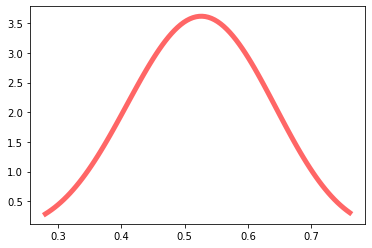

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np
#11 heads and 10 tails
a, b = 11.0, 10.0
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

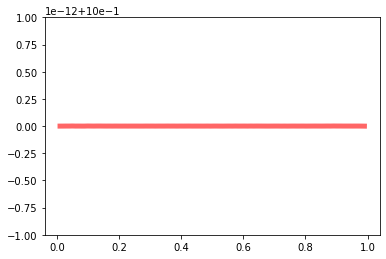

In [10]:
#1 head and 1 tails, there are some undefined areas like a,b=(1,0). Large numbers or more flips changes the shape
a, b = 1.0, 1.0
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

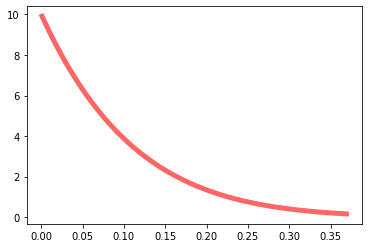

In [11]:
#1 head and 10 tails, an unfair coin
a, b = 1.0, 10.0
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

In [ ]:
https://courses.cs.washington.edu/courses/cse312/20su/files/student_drive/7.5.pdf
https://online.stat.psu.edu/stat504/lesson/1/1.5
    
    

In [ ]:
<p>From Bayes:$\pi_{\Theta}(\theta | x )= \frac{L(x|\theta)\pi_\Theta(\theta)}{\mathbb{P(x)}} \propto L(x|\theta)\pi_{\Theta}(\theta) $</p>
<p>Most derivations drop the denominator, is this a constant? </p>


$\hat \theta _{MAP} = \underset{\theta}{argmax}\  \pi_{\theta}(\theta | x) = \underset{\theta}{argmax}\  L(x | \theta) \pi_{\Theta}(\theta) $

In [ ]:
https://sci2lab.github.io/ml_tutorial/mle_map/

<h6>Multinomial</h6>
<p>Dirichlet Distribuiton
$$
 f(x_1,x_2,...x_k, \alpha_1,\alpha_2,...\alpha_k) = \frac{\Gamma(\sum_i^K \alpha_i)}{\sum_1^K \Gamma(\alpha_i) }\prod_1^K x_i^{\alpha_i-1}
$$
</p>
<p>
multinomial distribution
$$
 f(x_1,x_2,...x_k, p_1,p_2,...p_k) =\frac{\Gamma(n+1)}{\prod_1^K \Gamma(x_i+1)}\prod_1^K p_i^{x_i}
$$
</p>